# Lecture 5 - SciPy

Announcement
1. HW 1 will be due next week before the lecture
2. My office hours are Wednesdays between 1pm and 3pm in Huang basement (tables/couches outside ICME suite)
3. I have created an Ed discussion page for you to post homework or lecture questions.

# Basic Section (Start)===================



What we have seen so far
- Basic python language features
- Introduction to NumPy
- Plotting using matplotlib

Scipy is a collection of packages that provide useful mathematical functions commonly used for scientific computing.

List of subpackages (We will focus on the ones in **bold**)
- cluster : Clustering algorithms
- constants : Physical and mathematical constants
- fftpack : Fast Fourier Transform routines
- **integrate** : Integration and ordinary differential equation solvers
- **interpolate** : Interpolation and smoothing splines
- io : Input and Output
- ndimage : N-dimensional image processing
- odr : Orthogonal distance regression
- **optimize** : Optimization and root-finding routines
- signal : Signal processing
- sparse : Sparse matrices and associated routines
- spatial : Spatial data structures and algorithms
- special : Special functions
- **stats** : Statistical distributions and functions

We cannot cover all of them in detail but we will go through some of the packages and their capabilities today

- interpolate
- optimize
- stats
- integrate

We will also briefly look at some other useful packages
- networkx
- sympy

In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
from numpy import linalg as la

## Interpolation : `scipy.interpolate`

In [52]:
import scipy.interpolate as interp

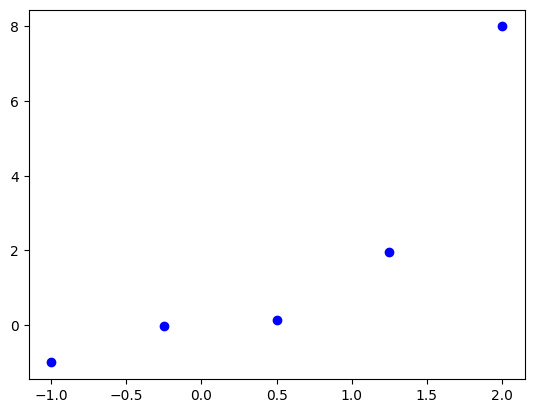

In [53]:
x = np.linspace(-1,2,5)
y = x**3
plt.plot(x,y,'bo')

In [54]:
f = interp.interp1d(x,y,kind="linear") #estimate the linear step-wise functions

In [55]:
print(f(1))

1.34375


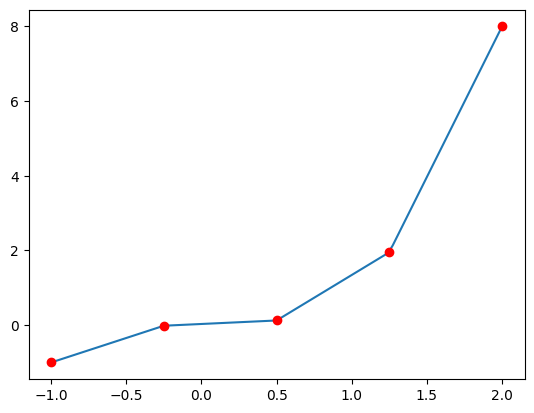

In [56]:
x_fine = np.linspace(-1,2,100)
plt.plot(x_fine,f(x_fine))

plt.plot(x,y,'ro')

In [57]:
f(3)

ValueError: A value (3.0) in x_new is above the interpolation range's maximum value (2.0).

In [ ]:
interp.interp1d?

In [58]:
f = interp.interp1d(x,
                    y,
                    kind="linear",
                    fill_value="extrapolate")
#estimate the linear step-wise functions

In [59]:
f(3)

array(16.0625)

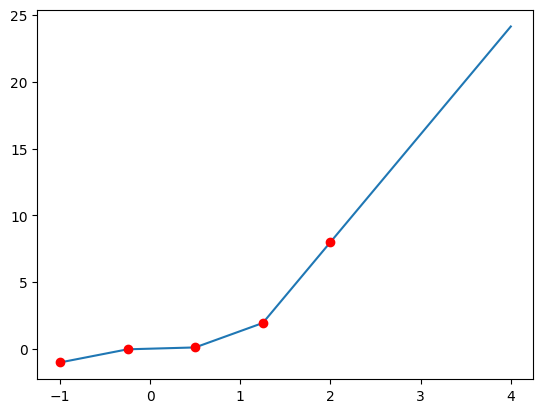

In [60]:
x_fine = np.linspace(-1,4,100)
plt.plot(x_fine,f(x_fine))

plt.plot(x,y,'ro')

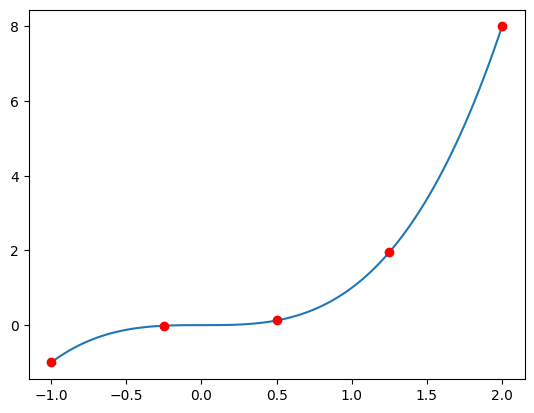

In [63]:
x_fine = np.linspace(-1,2,100)
#plt.plot(x_fine,interp.interp1d(x,y,kind="zero")(x_fine)) #stepwise fit
#plt.plot(x_fine,interp.interp1d(x,y,kind="linear")(x_fine)) #best linear fit
plt.plot(x_fine,interp.interp1d(x,y,kind="cubic")(x_fine)) #best fit curve
plt.plot(x,y,'ro')

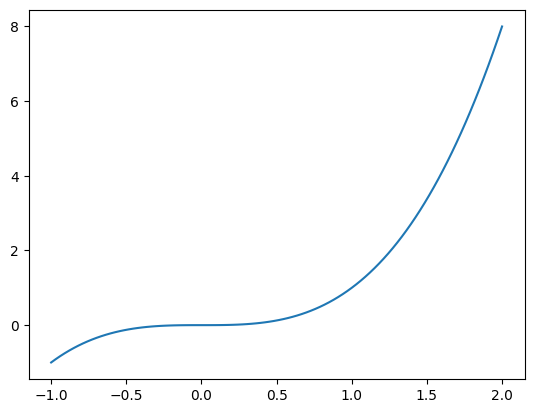

In [64]:
x1 = np.linspace(-1,2,100)
y1 = x1**3
plt.plot(x1,y1)
# y = f(x)

## Optimization : `scipy.optimize`

Contains functions to find minima, roots and fit parameters

In [65]:
from scipy import optimize

In [66]:
# Def a function with one arg x
def f(x):
    return x**4 - 10*x**2

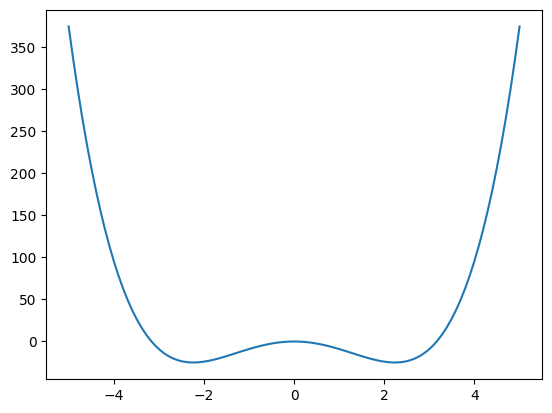

In [67]:
x = np.linspace(-5,5,100)
plt.plot(x,f(x))

In [68]:
# find the argmin(function)
results = optimize.minimize(f, -0.5) # function and initial guess
results

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -24.999999999999932
        x: [-2.236e+00]
      nit: 5
      jac: [ 2.146e-06]
 hess_inv: [[ 2.496e-02]]
     nfev: 18
     njev: 9

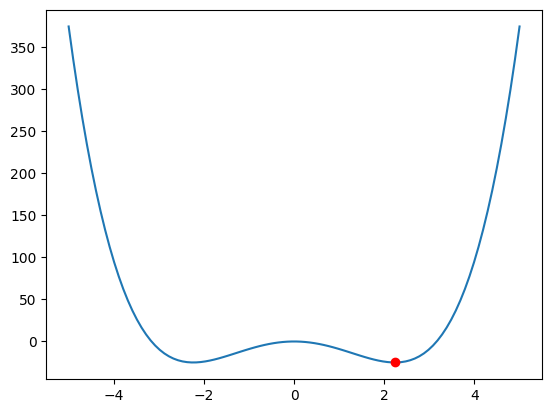

In [70]:
# let's plot the min points we found
# TODO: What if we change the initial guess??? Try to change -0.5 to 1
plt.plot(x,f(x))
results = optimize.minimize(f, 1)
plt.plot(results.x,f(results.x),'ro')
plt.show()

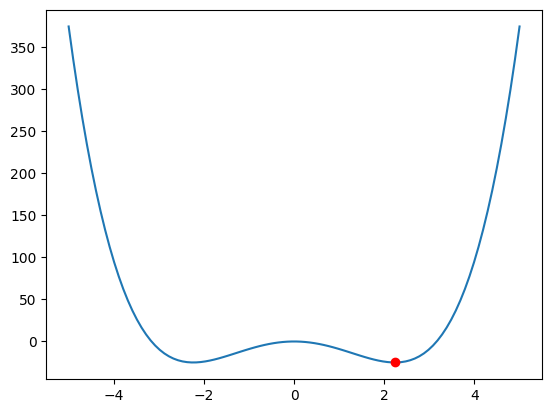

In [71]:
plt.plot(x,f(x))
results = optimize.minimize(f, 0.5)
plt.plot(results.x,f(results.x),'ro')
plt.show()

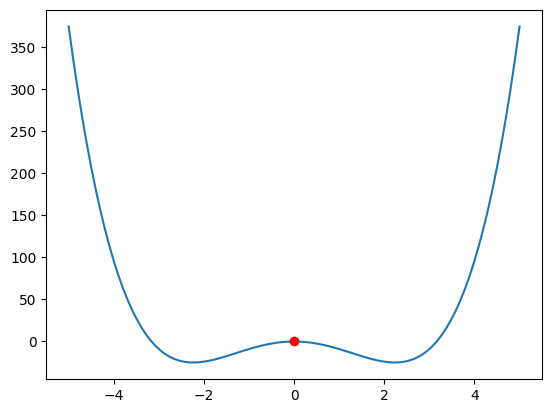

In [72]:
plt.plot(x,f(x))
results = optimize.minimize(f, 0)
plt.plot(results.x,f(results.x),'ro')
plt.show()

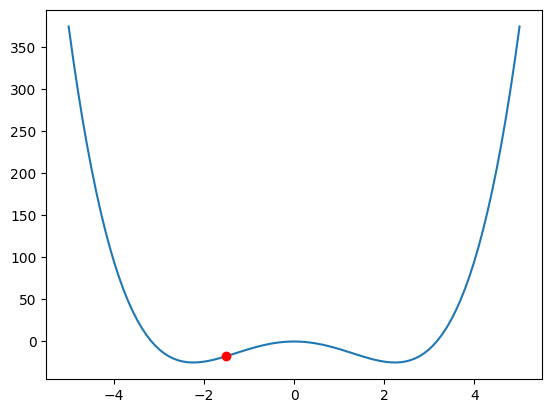

In [73]:
# What happen if we define the bounds and find the min value
plt.plot(x,f(x))
results = optimize.minimize(f, -0.5, bounds=[(-1.5,0)])
x_opt = results.x
plt.plot(x_opt,f(x_opt),'ro')
plt.show()

### Multivariate functions in python
$$ g(\vec{x}) = x_1 + x_2 * x_3 $$

$$ f(\vec{x}) = a * b * (x_1^2 + x_2^2 + 5(\sin(2x_1) + \sin(2x_2)))$$

In [ ]:
def g(x):
  # this assumes x is a list!
  x1,x2,x3 = x
  return x1 + x2 * x3


In [74]:
# input can be a numpy array data collection as multi-variate equation
def f(x, const_parameter1, const_parameter2):
    return const_parameter2* const_parameter1*(x[0]*x[0] + x[1]*x[1] + 5*(np.sin(2*x[0]) +np.sin(2*x[1])))

# add bounds to define the bounds for each variable element in x
results = optimize.minimize(fun = f,
                            x0 = np.array([0,0]),
                            bounds=[(-1,2),(-3,3)],
                            args = (3,4))
results

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: -106.54353918884198
        x: [-7.138e-01 -7.138e-01]
      nit: 7
      jac: [-1.990e-05 -2.700e-05]
     nfev: 27
     njev: 9
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

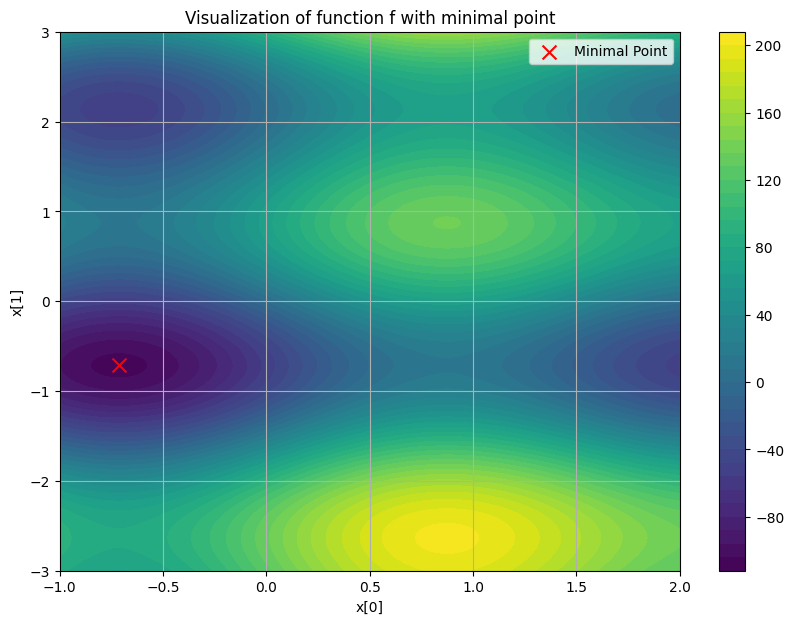

In [75]:
# What happen if we define the bounds and find the min value
# Generate data for visualization
x = np.linspace(-1, 2, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = f([X[i, j], Y[i, j]], 3, 4)

# Plotting
plt.figure(figsize=(10, 7))
contour = plt.contourf(X, Y, Z, 50, cmap='viridis')
plt.colorbar(contour)
plt.scatter(results.x[0], results.x[1], color='red', marker='x', s=100, label="Minimal Point")
plt.xlabel('x[0]')
plt.ylabel('x[1]')
plt.title('Visualization of function f with minimal point')
plt.legend()
plt.grid(True)
plt.show()


# Basic Section (End)===================

## Curve Fitting

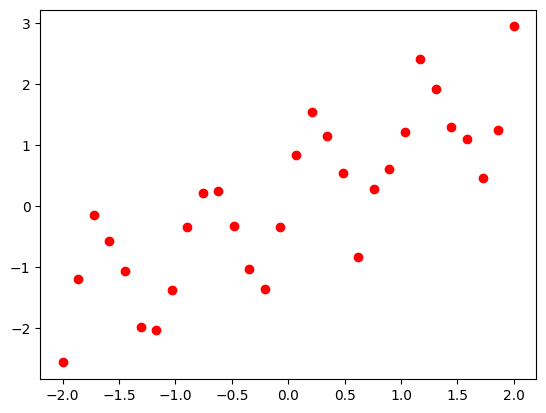

In [76]:
# wave pattern
x = np.linspace(-2,2,30)
y = x+np.sin(6.5*x)+0.3*np.random.randn(30)
plt.plot(x,y,'ro')

In [77]:
# let's take a guess
def f(x,a,b):
    return a*x +b

In [78]:
((a,b),_) = optimize.curve_fit(f,x,y,(0,1))
a,b

(0.8819885650726954, 0.09232094267096247)

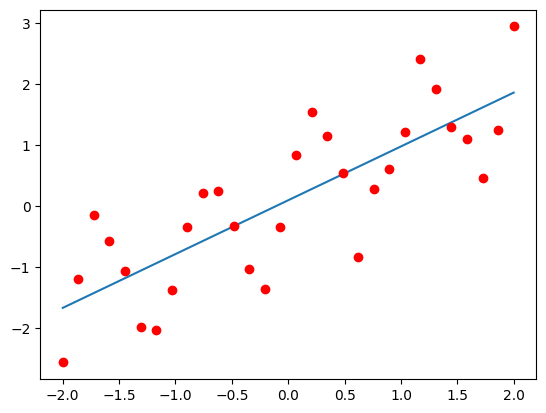

In [79]:
x_fine = np.linspace(-2,2,200)
plt.plot(x_fine,f(x_fine,a,b))
plt.plot(x,y,'ro')

In [80]:
# Let's use our example data in the begining, replacing the parameters into variables (unknowns!), and let python figure out
# what is the best fitting values for a,b,c,d?
def g(x,a,b,c,d):
    return a*x +b*np.sin(c*x)+d

In [81]:
#initial guess of a,b,c,d = 1.5, 0, 7, 0 which may affect the results
((a,b,c,d),_) = optimize.curve_fit(g,x,y,(1.5,0,7,0))
a,b,c,d

(0.9380146614203774, 1.1076401079847529, 6.570752816171255, 0.0923209436754172)

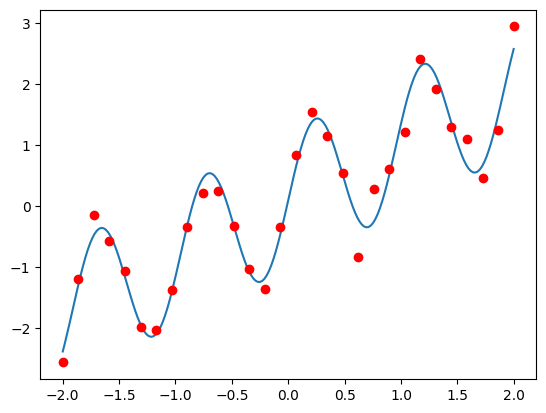

In [82]:
x_fine = np.linspace(-2,2,200)
plt.plot(x_fine,g(x_fine,a,b,c,d))
plt.plot(x,y,'ro')

### Root Finding

Some common root finiding techniques: bisection, Newton's, fixed point iteration, etc.

In [83]:
def f(x):
    return np.sin(x)

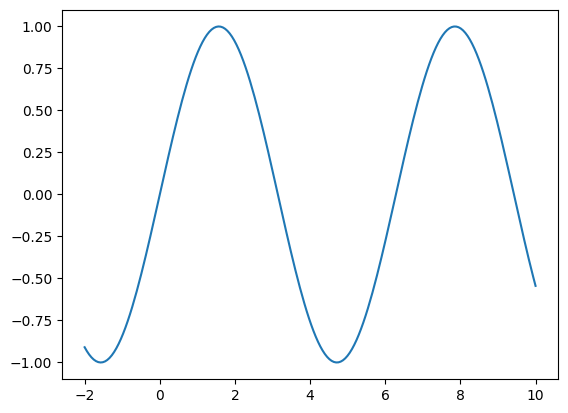

In [84]:
x_fine = np.linspace(-2,10,200)
plt.plot(x_fine,f(x_fine))

Lets apply the optimize.root function to find the root value (the value $x^*$ that makes $f(x^*) = 0$)

In [85]:
r = optimize.root(f,2)
r.x

array([3.14159265])

In [86]:
f(r.x)

array([1.2246468e-16])

#### check more about [scipy.optimize](https://docs.scipy.org/doc/scipy/tutorial/optimize.html?highlight=optimization#)

## Linear programming
A very common case in optimization is linear programming (LP). These are optimization problems that can be written in the form

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & c^{T}x  \\
\text{subject to} \;\; & A_{ub}x \leq b_{ub} \\
& A_{eq}x = b_{eq}
\end{split}
\end{equation}
$$

Here, we are finding the vector $x$ that minimizes the dot product $c^T x$, where $c$ is some fixed vector, out of all $x$ that satisfy $A_{ub}x \leq b_{ub}$ and $A_{eq}x = b_{eq}$, where $A_{ub}$ and $A_{eq}$ are matrices and $b_{ub}$ and $b_{eq}$ are vectors. This is an LP because  the objective function (and constraints) are linear in the unknown variable $x$.

## Exercise (in-class)
Using Google and reading documentation are important parts of programming. [`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/optimize.html) comes with specialized functions for solving linear programming problems.

Figure out how to solve LPs using `scipy.optimize`, and solve the following LP:
$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & x_1 + 2 x_2  \\
\text{subject to} \;\; & x_1 \leq 1 \\
& 5 x_1 + x_2 \geq 0
\end{split}
\end{equation}
$$

Note that the problem is equivalent to

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & c^T x  \\
\text{subject to} \;\; & A_{ub}x \leq b_{ub} \\
& A_{eq}x = b_{eq}
\end{split}
\end{equation}
$$
where
$$
c = \begin{pmatrix} 1 \\ 2 \end{pmatrix} \qquad
A_{ub} = \begin{pmatrix} 1 & 0 \\ -5 & -1 \end{pmatrix}, \qquad
b_{ub} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \qquad
A_{eq} = 0, \qquad
b_{eq} = 0.
$$

We can see this because
$$
 \begin{pmatrix} 1 & 0 \\ -5 & -1 \end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \end{pmatrix} \leq \begin{pmatrix} x_1 \\ -5x_1 - x_2 \end{pmatrix}
$$

In [88]:
c = np.array([1,2])
Aub = np.array([[1,0],[-5,-1]])
bub = np.array([1,0])

In [89]:
# YOUR CODE HERE
x1_bounds = (None, None)
x2_bounds = (None, None)
result = optimize.linprog(c, Aub, bub, bounds=[x1_bounds, x2_bounds])
result

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -9.0
              x: [ 1.000e+00 -5.000e+00]
            nit: 0
          lower:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-9.000e+00 -2.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

In [91]:
c.T@result.x

-9.0

In [92]:
Aub@result.x

array([1., 0.])

HINT: check the documentation for [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html?highlight=scipy%20optimize%20linprog#scipy.optimize.linprog)

## Statistics : `scipy.stats`

In [93]:
from scipy import stats

Find the maximum likelihood estimate for parameters

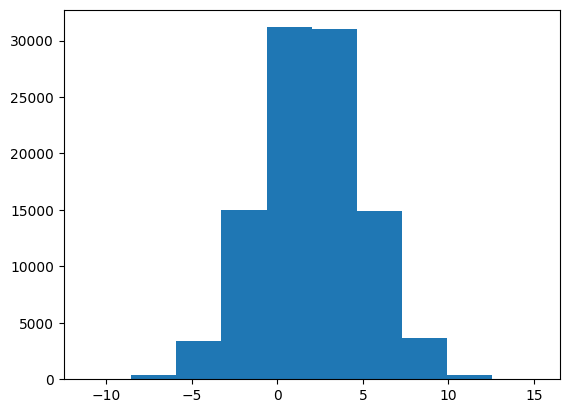

In [94]:
samples = 3*np.random.randn(100_000)+2
plt.hist(samples)
plt.show()

In [95]:
stats.norm.fit(samples) #return mean and standard deviation

(2.0094349865144134, 2.9965364185633687)

In [96]:
a = np.random.randn(300)
b = np.random.randn(300) + 0.5 #try + 0.5

In [97]:
# t test for independent distributions to see if they have equal means
# In shorts, assuming they have same mean, how likely our assumption would occur
stats.ttest_ind(a,b)

TtestResult(statistic=-5.063774942295436, pvalue=5.481864724251383e-07, df=598.0)

In [ ]:
#Pearson correlation coefficient -> measuring if two data is correclated
# ?stats.pearsonr

In [98]:
# if the expected value of a is significantly different from the expected value of b
a = np.random.randn(300)
b = np.random.randn(300)/2 + a/2

In [99]:
stats.pearsonr(a,b) #r-value and p-value

PearsonRResult(statistic=0.7258836882330566, pvalue=2.340585152862317e-50)

You can also perform kernel density estimation

In [100]:
x = np.hstack(( 2*np.random.randn(1000)+5,  0.6*np.random.randn(1000)-1) )

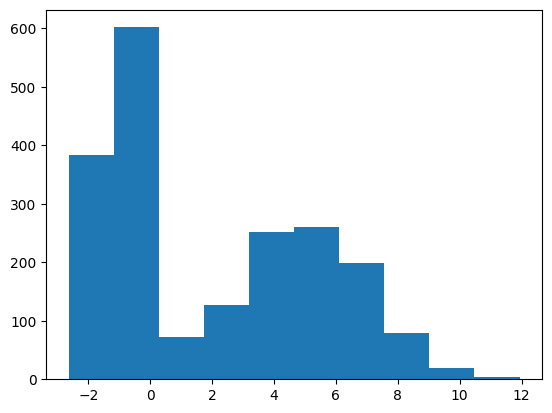

In [101]:
plt.hist(x);

In [102]:
pdf = stats.kde.gaussian_kde(x)
#we have two distribution, but we are going to capture features from both

<ipython-input-102-a63ada4d73b7>:1: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  pdf = stats.kde.gaussian_kde(x)


In [103]:
pdf(10)

array([0.0062314])

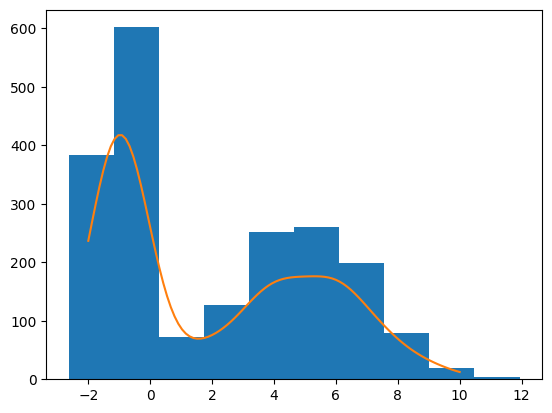

In [104]:
counts,bins,_ = plt.hist(x)
x_fine=np.linspace(-2,10,100)
plt.plot(x_fine,np.sum(counts)*pdf(x_fine))

## Numerical Integration : `scipy.integrate`

In [105]:
import scipy.integrate as integ

You can compute integral using the `quad` funtion

In [106]:
def f(x):
  return 2*x

In [107]:
integ.quad(f,0,2) #f and upper and lower bounds
# return value up to an error tolerance this much

(4.0, 4.440892098500626e-14)

In [108]:
integ.quad?

You can also solve ODEs of the form
$$ \frac{dy}{dt} = f(y,t) $$

In [109]:
def f(y,t): #dev function
    return (t*y[1], -y[1]-9*y[0])

In [110]:
# f: Computes the derivative of y at t
# y0 = [1,1] Initial condition on y (can be a vector).
# t: A sequence of time points for which to solve for y.
# Return: Array containing the value of y for each desired time in t,
#         with the initial value y0 in the first row.
t = np.linspace(0,10,100)
Y = integ.odeint(f,y0 =[1,1],t=t)

In [111]:
Y.shape

(100, 2)

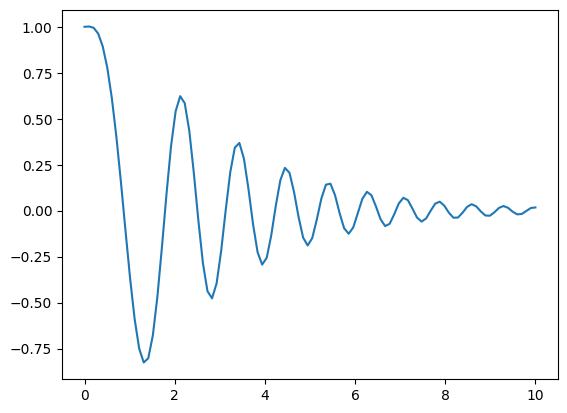

In [112]:
plt.plot(t,Y[:,0])

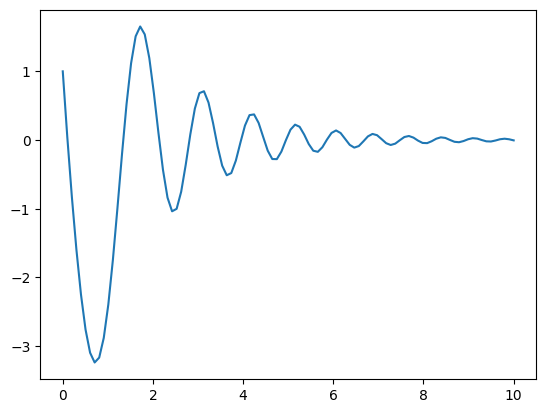

In [113]:
plt.plot(t,Y[:,1])

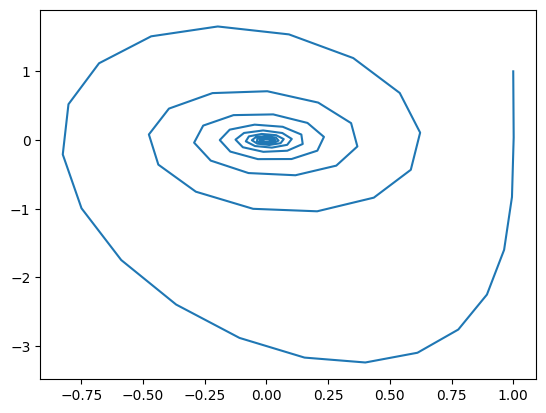

In [114]:
plt.plot(Y[:,0],Y[:, 1])

## Physical simulation
Let's simulate a throwing a ball in two dimensions. The ball is described as a function of time by four functions: $x(t), y(t), v_x(t), v_y(t)$, which are governed by the ODE system:

$$
    \frac{dx}{dt} = v_x, \qquad
    \frac{dy}{dt} = v_y, \qquad
    \frac{dv_x}{dt} = 0, \qquad
    \frac{dv_y}{dt} = -g.
$$

We can think of this in vectorized form as:

$$
    \frac{d}{dt} \begin{pmatrix} x \\ y \\ v_x \\ v_y \end{pmatrix} = \begin{pmatrix} v_x \\ v_y \\ 0 \\ -g \end{pmatrix}
$$

In [115]:
def dzdt(z, t):
    x, y, vx, vy = z
    g = 1
    return np.array([vx, vy, 0, -g])

In [116]:
import matplotlib.pyplot as plt

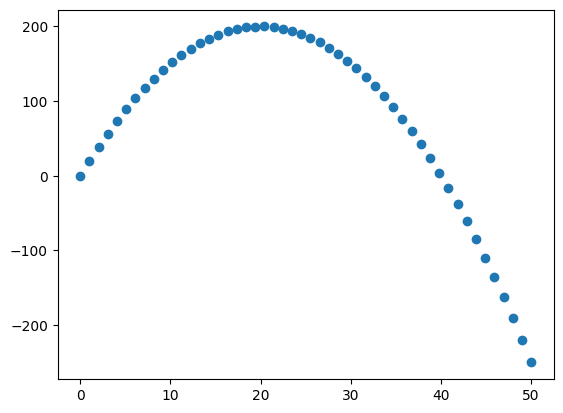

In [117]:
x, y = 0, 0
vx, vy = 1, 20

z = np.array([x, y, vx, vy])
t = np.linspace(0, 50, 50)

result = integ.odeint(dzdt, z, t)

plt.scatter(result[:, 0], result[:, 1])
plt.show()

## Exercise(Post_lecture)
We can add drag with the following slight modification to the ODE, which adds a force with direction opposing the current velocity, and with magnitude proportional to the velocity squared.
    
$$
    \frac{d}{dt} \begin{pmatrix} x \\ y \\ v_x \\ v_y \end{pmatrix} = \begin{pmatrix} v_x \\ v_y \\ -\alpha v_x \sqrt{v_x^2 + v_y^2} \\ -g -\alpha v_y \sqrt{v_x^2 + v_y^2} \end{pmatrix}
$$

Implement this with $\alpha = 0.001$, plot the resulting trajectory, and compare to the dragless case.

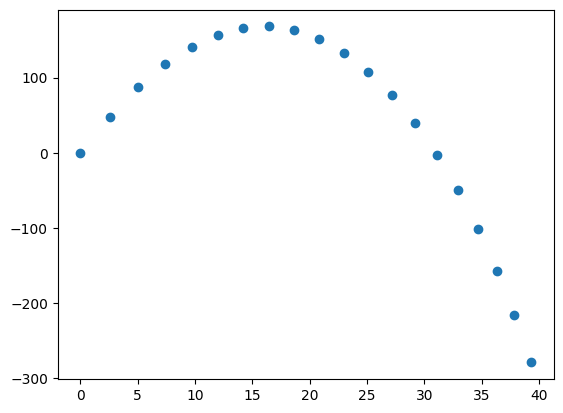

In [152]:
# YOUR CODE HERE
def dzdt(z,t):
  x,y,vx,vy = z
  g = 1
  a = 0.001
  return np.array([vx,vy,0-a*vx*np.sqrt(vx*vx+vy*vy), -g-a*vy*np.sqrt(vx*vx+vy*vy)])
x,y=0,0
vx,vy=1,20
z=np.array([x,y,vx,vy])
t = np.linspace(0,50,20)

res = integ.odeint(dzdt, z,t )

plt.scatter(res[:,0], res[:,1])
plt.show()

# Other useful packages

## `networkx`
Useful Package to handle graphs.

Install by running `conda install networkx`

In [118]:
import networkx as nx

In [119]:
G = nx.Graph()


In [120]:
G.add_nodes_from([1,2,3,4])

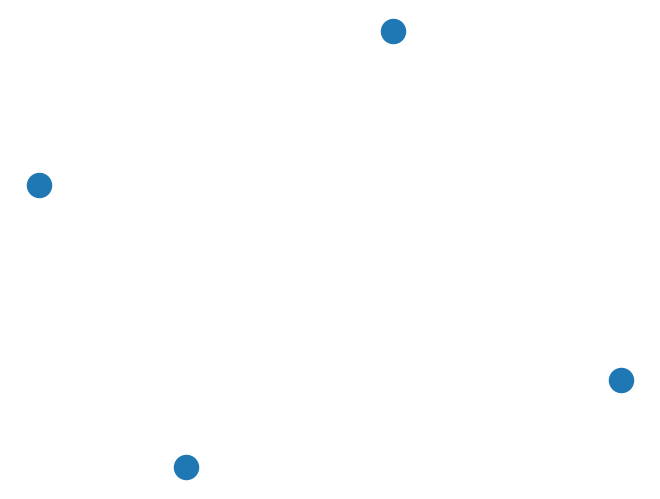

In [121]:
nx.draw(G)

In [122]:
G.add_edge(1,2)

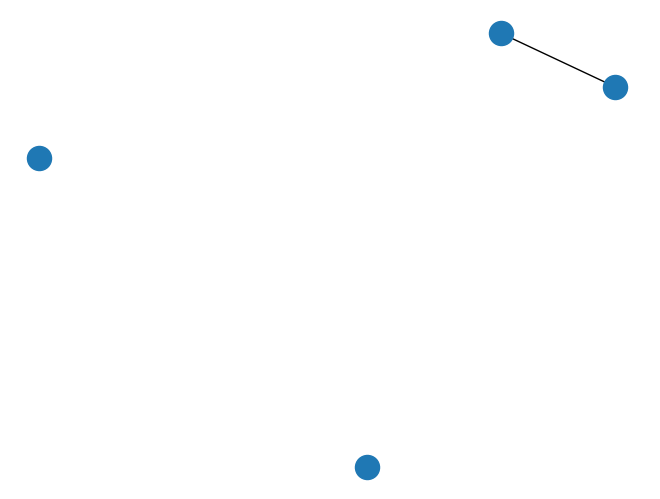

In [123]:
nx.draw(G)

In [124]:
G.add_edge(2,3)
G.add_edge(3,1)
G.add_edge(3,4)

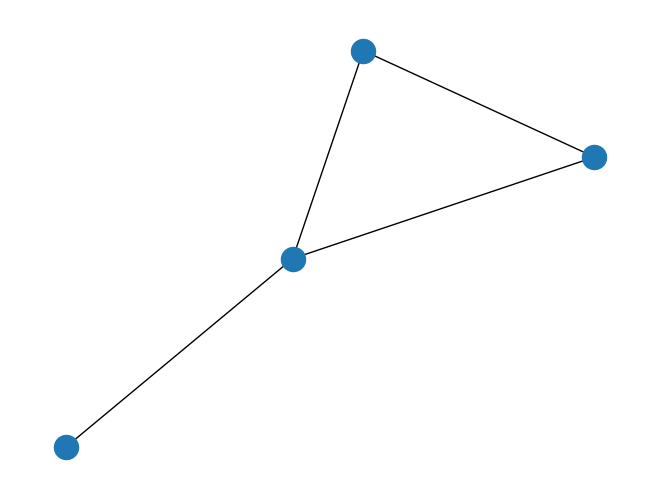

In [125]:
nx.draw(G)

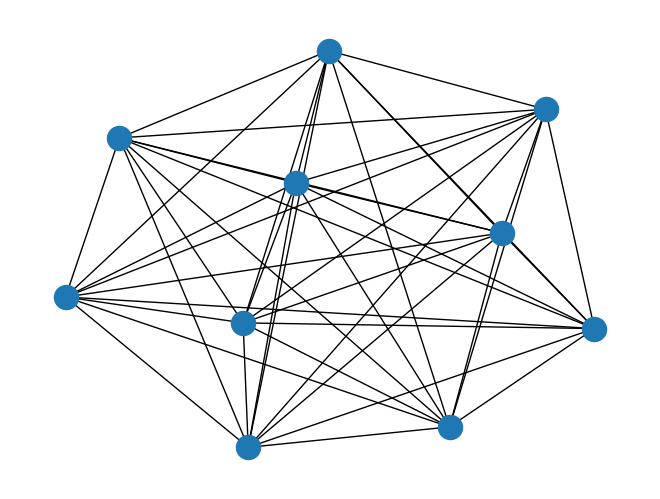

In [126]:
G = nx.complete_graph(10)
nx.draw(G)

## `sympy`

Package for performing symbolic computation and manipulation.

Install it in your environment by running `conda install sympy`

In [127]:
0.2 + 0.1 == 0.3

False

In [128]:
#That's because .1 cannot be represented exactly
#in a binary floating point representation. If you try
print(0.1)

0.1


In [129]:
#Python will respond with .1 because it only prints up
# to a certain precision, but there's already a small round-off
# error. The same happens with .3, but when you issue
print(0.2 + 0.1)
#then the round-off errors in .2 and .1 accumulate. Also note:
print(0.2 + 0.1 == 0.3)

0.30000000000000004
False


In [ ]:
# IEEE Standard: Floating Point Number and Runoff Error

In [130]:
from sympy import *

In [132]:
x,y = symbols(["x","y"])

In [133]:
x

x

In [134]:
expr = x+y**2

In [135]:
expr

x + y**2

In [136]:
x*expr

x*(x + y**2)

In [137]:
expand(x*expr)

x**2 + x*y**2

In [138]:
factor(x**2 - y**2)

(x - y)*(x + y)

In [139]:
latex(expr)

'x + y^{2}'

In [140]:
simplify( (x-y)**2 + (x+y)**2)

2*x**2 + 2*y**2

In [141]:
x**2/(y**3+y)

x**2/(y**3 + y)

In [142]:
(x**2/(y**3+y)).subs(y,(x/2)).simplify() #substitue value of y with another parameter

8*x/(x**2 + 4)

In [151]:
nsimplify((x**2/(y**3+y)).evalf(subs={'x':2, 'y':4})) #value plug in
# 4/(64+4)

1/17

In [144]:
Integral(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo)) #integration, infinity here is - with two o

Integral(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

In [145]:
I = Integral(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

In [146]:
I.doit() # do the calculation

pi

In [147]:
(sin(x)/(1+cos(x)))

sin(x)/(cos(x) + 1)

In [148]:
(sin(x)/(1+cos(x))).series(x,0,10) #taylor series center at 0 with 10 terms

x/2 + x**3/24 + x**5/240 + 17*x**7/40320 + 31*x**9/725760 + O(x**10)